In [113]:
# import required libraries 
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [49]:
data = pd.DataFrame()
stocks = os.listdir('stocks')[1:]
for stock_name in stocks : 
    close_price_stock = pd.read_csv('stocks/'+stock_name)['close'].copy()
    if (len(close_price_stock)>=1000):
        data[ stock_name[:-4] ] = close_price_stock.values[:1000]
    

In [50]:
data.head()

,AAL_data,AAPL_data,AAP_data,ABBV_data,ABC_data,ABT_data,ACN_data,ADBE_data,ADI_data,ADM_data,...,XLNX_data,XL_data,XOM_data,XRAY_data,XRX_data,XYL_data,YUM_data,ZBH_data,ZION_data,ZTS_data
0,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
3,14.66,66.7156,78.97,35.27,46.64,34.46,73.56,38.81,46.26,31.16,...,37.80,28.42,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
4,13.99,66.6556,78.84,36.57,46.77,34.70,73.13,38.61,46.54,31.40,...,38.44,28.22,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


In [65]:
# Now I have S&P 500 stock data . We can do PCA on this data as columns are all numerical continuous variables

In [66]:
# Step -1 : Make mean of all columns zero 
data.mean()

AAL_data      35.859285
AAPL_data     97.205088
AAP_data     136.052400
ABBV_data     56.099090
ABC_data      80.690740
                ...    
XYL_data      36.941690
YUM_data      75.843810
ZBH_data     101.981540
ZION_data     28.795324
ZTS_data      40.432948
Length: 483, dtype: float64

In [68]:
data = data - data.mean()

In [72]:
X = data.values

In [79]:
A = (X.T@X)

In [115]:
# transformation vector which give highest variance projection is actually the eigne vector corresponding to maximum eigen 
# value of matrix A = X.T * X

eigen_values, eigen_vectors = np.linalg.eig(A)
zipped_ = sorted(zip(eigen_values,eigen_vectors), reverse=True)
eigen_vectors = np.array([ x for _, x in zipped_ ]).T
variances = np.array([ y for y,_ in zipped_])
variances = variances/sum(variances)

<BarContainer object of 5 artists>

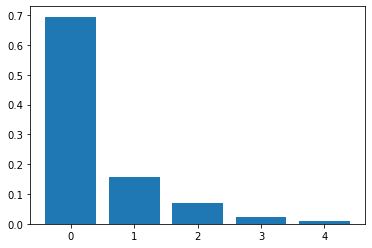

In [123]:
plt.bar(range(len(variances))[:5],variances[:5])

In [124]:
sum(variances[:5])

0.9557978552947868

In [129]:
# First five principal components can summarize ~96% variance of data. Pretty cool . 5 times BAM!!!